In [56]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from rasterio.transform import Affine
from rasterio.enums import Resampling
import pandas as pd
from scipy.optimize import curve_fit

from cmcrameri import cm

In [93]:
file = "Sudenitsa_altrad_AO2015.csv"
df = pd.read_csv(file)
df = df[df["emis"]>0]
df = df.sort_values(by=['pradius'])
tess_df = df[df["tessera"]==1]

In [94]:
print(df.columns)
data = df.to_numpy()
tess_data = tess_df.to_numpy()

Index(['FID', 'orbit', 'footprint', 'lat', 'lon', 'pradius', 'rms_slope',
       'ref', 'ref_corr', 'emis', 'oc2015', 'sc2015', 'cpr2015', 'cpr2015_n',
       'tessera'],
      dtype='object')


In [95]:
elev_min = np.min(data[:,5])
elev_max = np.max(data[:,5])
elev_range = np.arange(int(elev_min), int(elev_max)+1, 1)
print(elev_min,elev_max, elev_range)

6046.3525 6059.3223 [6046 6047 6048 6049 6050 6051 6052 6053 6054 6055 6056 6057 6058 6059]


In [96]:
mean_all = np.zeros((len(elev_range-1), 8), dtype = np.float32)
stdev_all = np.zeros_like(mean_all)

mean_tess = np.zeros_like(mean_all)
stdev_tess = np.zeros_like(mean_all)

In [97]:
min_idx = 0
min_tess_idx = 0
max_idx = 0
max_tess_idx = 0

for i in range(len(elev_range)):
    try:
        e = elev_range[i+1]
    except:
        break
        
    if not len(np.where(data[:,5]<e)[0]) == 0:
        max_idx = np.argmax(np.where(data[:,5]<e))
        if (max_idx - min_idx != 0) | (min_idx != 0):
            temp_all = data[min_idx:max_idx, 6:-1].astype(np.float32)

            mean_all[i, :] = np.mean(temp_all, axis = 0) 
            stdev_all[i, :] = np.std(temp_all, axis = 0) 


    if not len(np.where(tess_data[:,5]<e)[0]) == 0:
        max_tess_idx = np.argmax(np.where(tess_data[:,5]<e))
        print(e, min_tess_idx, max_tess_idx)
        if (max_tess_idx - min_tess_idx != 0) | (min_tess_idx != 0):
            temp_tess = tess_data[min_tess_idx:max_tess_idx, 6:-1].astype(np.float32)

            mean_tess[i, :] = np.mean(temp_tess, axis = 0) 
            stdev_tess[i, :] = np.std(temp_tess, axis = 0) 

    
    min_idx = max_idx
    min_tess_idx = max_tess_idx

6049 0 1
6050 1 10
6051 10 59
6052 59 335
6053 335 2553
6054 2553 4016
6055 4016 5260
6056 5260 5861
6057 5861 5896
6058 5896 5896
6059 5896 5899


0 -rms_slope; 1 -ref; 2 -ref_corr; 3 -emis; 4 -oc2015; 5 -sc2015; 6 -cpr2015; 7 -cpr2015_n

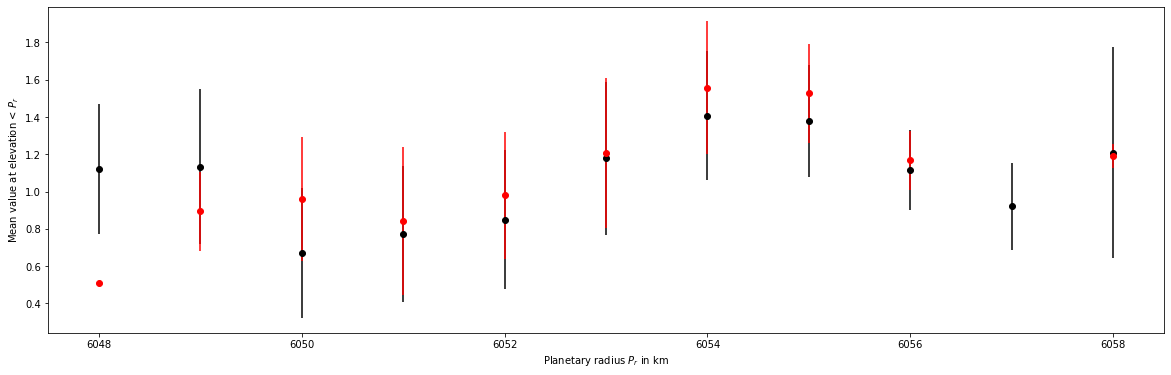

In [103]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(20,6)
cmap = cm.hawaii
n = 6

ax.errorbar(elev_range[2:-1], mean_all[2:-1,n], yerr= stdev_all[2:-1,n], fmt='o', color = 'k')
ax.errorbar(elev_range[2:-1], mean_tess[2:-1,n], yerr= stdev_tess[2:-1,n], fmt='o', color = 'red')
ax.set_xlabel("Planetary radius " + r'$P_r$'+ " in km")
ax.set_ylabel("Mean value at elevation < " + r'$P_r$')
plt.show()

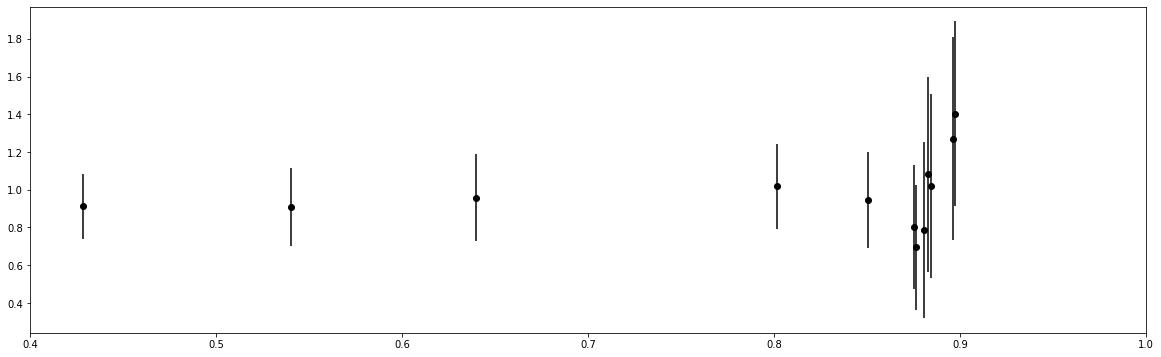

In [90]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(20,6)
cmap = cm.hawaii
xval = 3
yval = 6

ax.errorbar(mean_all[2:-1,xval], mean_all[2:-1,yval], yerr= stdev_all[2:-1,yval], fmt='o', color = 'k')
# ax.errorbar(mean_tess[2:-1,xval], mean_all[2:-1,yval], yerr= stdev_tess[2:-1,yval], fmt='o', color = 'red')
ax.set_xlim(0.4,1)
plt.show()

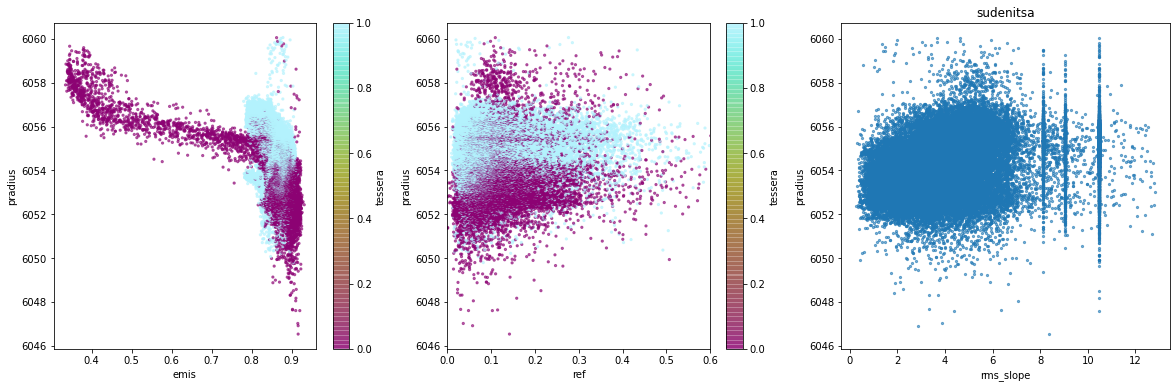

In [91]:
fig, ax = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(20,6)
cmap = cm.hawaii

df.plot.scatter('emis', 'pradius', c="tessera", cmap=cmap, alpha = 0.6, s=5,  ax = ax[0])
df.plot.scatter('ref', 'pradius', c="tessera", cmap=cmap, alpha = 0.6, s=5,  ax = ax[1])
df.plot.scatter('rms_slope', 'pradius', cmap=cmap, alpha = 0.6, s=5,  ax = ax[2])
ax[1].set_xlim(0,0.6)
plt.title("sudenitsa")
plt.show()

In [92]:
def exp_fit(x,a,b,c):
    # return a*x**2 + b*x + c
    # return a*np.exp(-b*x)
    return (a)/(1+b*np.exp(c*x))

prad = df.pradius.to_numpy() - 6051.8
emis = df.emissivity.to_numpy()
popt, pcov = curve_fit(exp_fit, prad, emis)
print(popt, pcov)
x = np.linspace(-3, 6, 100)
y = exp_fit(x, *popt)
plt.scatter(prad, emis, alpha = 0.6, s=5)
# plt.plot(prad, exp_fit(prad, *popt), 'k')
plt.plot(x, y, 'k')
plt.show()

AttributeError: 'DataFrame' object has no attribute 'emissivity'

In [55]:
plt.scatter(prad, emis / exp_fit(prad, *popt), c=df.rms_slope, cmap=cm.tokyo, alpha = 0.6, s=5)
plt.colorbar()
plt.ylim(0.7,1.2)

NameError: name 'emis' is not defined